# Housing Price prediction

#### A US-based housing company named Surprise Housing has decided to enter the Australian market, the company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price, the company has collected a data set from the sale of houses in Australia, the company is looking at prospective properties to buy to enter the market.

#### The company wants to know:

###### 1. Which variables are significant in predicting the price of a house.

###### 2. How well those variables describe the price of a house.

### Business Goal 

##### 1. The price of houses with the available independent variables.
##### 2. how exactly the prices vary with the variables
##### 3. Management need to understand the pricing dynamics of a new market.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# Importing data

In [3]:
Housing = pd.read_csv(r"train.csv")

In [4]:
Housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Understanding & Data Cleansing

In [5]:
Housing.shape

(1460, 81)

In [6]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
# checking null's in dataframe
print(Housing.isnull().sum().sort_values(ascending=False))

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [8]:
print(Housing.isnull().values.any())

True


In [9]:
print(Housing.isnull().values.sum())

6965


In [10]:
# check Null % in dataframe
print (round((Housing.isnull().sum() * 100/ len(Housing)),2).sort_values(ascending=False))

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
                 ...  
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
3SsnPorch         0.00
BsmtUnfSF         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
Functional 

#### we can clearly notice that few columns have high Null %, its better to drop the columns where null% > 70

In [11]:
# Drop the columns above 70% null

Housing = Housing.drop(Housing.loc[:,list(round(100*(Housing.isnull().sum()/len(Housing.index)), 2)>70)].columns, 1)

In [12]:
Housing.shape

(1460, 77)

In [13]:
# check the null % 

print (round((Housing.isnull().sum() * 100/ len(Housing)),2).sort_values(ascending=False))

FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofMatl          0.00
RoofStyle         0.00
SalePrice         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
BldgType          0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
Condition2        0.00
                 ...  
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
3SsnPorch         0.00
BsmtUnfSF         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
Functional 

##### we will check one-by-one null columns whether it is giving valid information or not, if not we will drop those columns

##### FireplaceQu Metric

In [14]:
Housing.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [15]:
Housing.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

According to data dictionary, NA is for 'No Fire place', so we can impute 'Nan' or Null as NA

In [16]:
Housing['FireplaceQu'] = Housing['FireplaceQu'].replace(np.nan, 'NA')

In [17]:
Housing.FireplaceQu.unique()

array(['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

After imputing not available option, NA is high count so it is not giving correct information for sales

###### LotFrontage Metric & GarageYrBlt Metric

In [18]:
Housing.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

Here the values falls as float where it is originally int, we will change the datatype and check the analysis

In [19]:
Housing['LotFrontage'] = Housing['LotFrontage'].apply(lambda x: int(x) if x==x else 60)

In Lot frontage its better to impute the max value for null's i.e 60

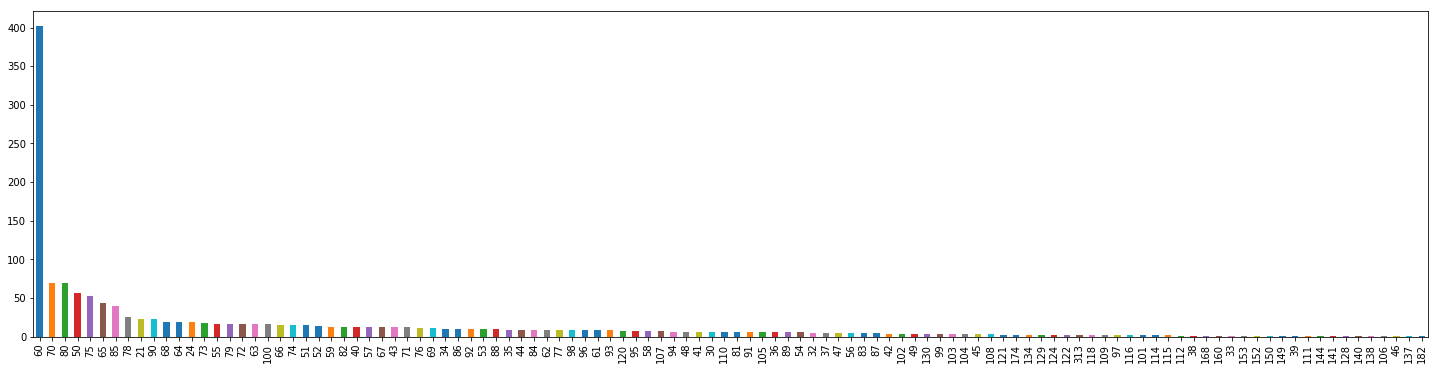

In [20]:
plt.figure(figsize=(25,6))
Housing['LotFrontage'].value_counts().plot(kind='bar')

In [21]:
Housing.GarageYrBlt.unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

Here we can impute null's as 2005

In [22]:
#Housing['GarageYrBlt'] = Housing['GarageYrBlt'].replace('', 2005)

Housing['GarageYrBlt'] = Housing['GarageYrBlt'].apply(lambda x: int(x) if x==x else 2005)

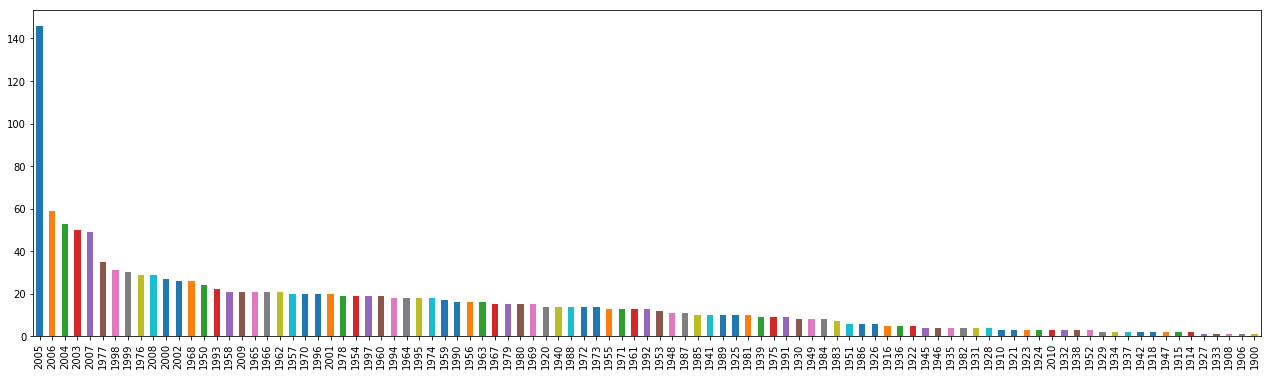

In [23]:
plt.figure(figsize=(22,6))
Housing.GarageYrBlt.value_counts().plot(kind='bar')
plt.show()

##### GarageFinish Metric

In [24]:
Housing.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [25]:
Housing.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

As per Data dictionary NaN values are referred as No Garage, so we can impute the same over here

In [26]:
Housing['GarageFinish'] = Housing['GarageFinish'].replace(np.nan, 'None')

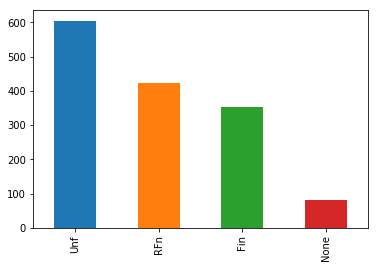

In [27]:
Housing.GarageFinish.value_counts().plot(kind='bar')

##### GarageType Metric

In [28]:
Housing.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [29]:
Housing.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

As per Data dictionary NaN values are No Garage, so we can impute the same over here

In [30]:
Housing['GarageType'] = Housing['GarageType'].replace(np.nan, 'None')

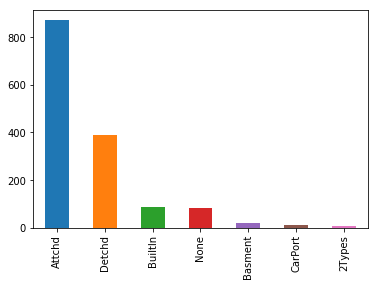

In [31]:
Housing.GarageType.value_counts().plot(kind='bar')

###### GarageCond Metric

In [32]:
Housing.GarageCond.unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [33]:
Housing['GarageCond'] = Housing['GarageCond'].replace(np.nan, 'NA')

In [34]:
Housing.GarageCond.unique()

array(['TA', 'Fa', 'NA', 'Gd', 'Po', 'Ex'], dtype=object)

#### GarageQual Metric

In [35]:
Housing.GarageQual.unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [36]:
Housing['GarageQual'] = Housing['GarageQual'].replace(np.nan, 'NA')

##### BsmtFinType2 Metric

In [37]:
Housing['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [38]:
Housing['BsmtFinType2'] = Housing['BsmtFinType2'].replace(np.nan, 'NA')

##### BsmtExposure Metric

In [39]:
Housing.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [40]:
Housing['BsmtExposure'] = Housing['BsmtExposure'].replace(np.nan,'NA')

##### BsmtFinType1 Metric

In [41]:
Housing.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [42]:
Housing['BsmtFinType1']=Housing['BsmtFinType1'].replace(np.nan,'NA')

##### BsmtCond Metric

In [43]:
Housing.BsmtCond.unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [44]:
Housing['BsmtCond'] = Housing['BsmtCond'].replace(np.nan,'NA')

##### BsmtQual Metric

In [45]:
Housing.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [46]:
Housing['BsmtQual'] = Housing['BsmtQual'].replace(np.nan, 'NA')

###### MasVnrArea Metric

In [47]:
Housing['MasVnrArea'] = Housing['MasVnrArea'].replace(np.nan, 0)

##### MasVnrType Metric

In [48]:
Housing.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [49]:
Housing.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [50]:
Housing['MasVnrType'] = Housing['MasVnrType'].replace(np.nan, 'None')

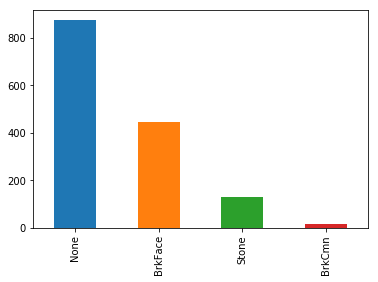

In [51]:
Housing.MasVnrType.value_counts().plot(kind='bar')

##### Electrical Metric

In [52]:
Housing.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [53]:
Housing.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [54]:
# Impute 'SBrkr' value in null's

Housing['Electrical'] = Housing['Electrical'].replace(np.nan, 'SBrkr')

In [55]:
print (round((Housing.isnull().sum() * 100/ len(Housing)),2).sort_values(ascending=False))

SalePrice        0.0
ExterCond        0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
TotalBsmtSF      0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
                ... 
WoodDeckSF       0.0
EnclosedPorch    0.0
HeatingQC        0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
GarageYrBlt      0.0
GarageType       0.0
FireplaceQu      0.0
Fireplaces       0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF     

Now data look good without any nulls, we will move on to next step

###### We are not using ID column, so we can drop it

In [56]:
Housing = Housing.drop(['Id'], axis = 1)

In [57]:
Housing.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [58]:
Housing.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

Only 2 values are exists in this column, so we replace it as 1 and 0

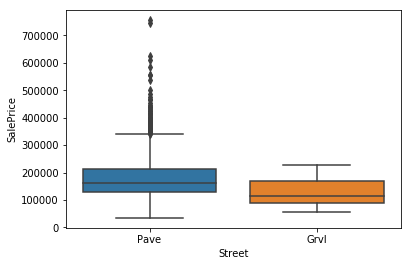

In [59]:
sns.boxplot(x='Street', y='SalePrice', data=Housing)

Housing = Housing.replace({'Street' : {'Pave' : 1, 'Grvl' : 0}})


In [60]:
Housing.LotShape.unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [61]:
Housing.LandContour.unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [62]:
Housing.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

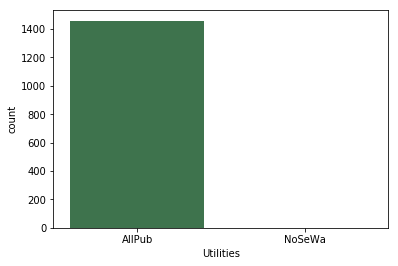

In [63]:
sns.countplot(x='Utilities', data=Housing, palette="Greens_d")
Housing.loc[Housing.Utilities.isnull(), 'Utilities'] = Housing.loc[:, 'Utilities'].mode()[0]
Housing = Housing.replace(
    {
        'Utilities': {
            'AllPub': 1,
            'NoSeWa': 0,
        }
    }
)

In [64]:
Housing.LotConfig.unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [65]:
Housing.LandSlope.unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [66]:
Housing.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [67]:
Housing.Condition1.unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [68]:
Housing.Condition2.unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [69]:
Housing.BldgType.unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [70]:
Housing.HouseStyle.unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [71]:
Housing.RoofStyle.unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [72]:
Housing.RoofMatl.unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

In [73]:
Housing.Exterior1st.unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [74]:
Housing.Exterior2nd.unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [75]:
Housing.ExterQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [76]:
Housing.ExterCond.unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [77]:
Housing.Foundation.unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

In [78]:
Housing.Heating.unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

In [79]:
Housing.HeatingQC.unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [80]:
Housing.CentralAir.unique()

array(['Y', 'N'], dtype=object)

In [81]:
Housing.KitchenQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [82]:
Housing.Functional.unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [83]:
Housing.PavedDrive.unique()

array(['Y', 'N', 'P'], dtype=object)

In [84]:
Housing.SaleType.unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [85]:
Housing.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

##### we will check all numerical columns

In [86]:
display(Housing.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1460.0,68.267123,22.356355,21.0,60.00,63.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
Street,1460.0,0.995890,0.063996,0.0,1.00,1.0,1.00,1.0
Utilities,1460.0,0.999315,0.026171,0.0,1.00,1.0,1.00,1.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0


In [87]:
Housing.shape

(1460, 76)

## Exploratory Data Analytics

##### In Dataset, we can notice that many classifications are mentioned i,e Basement, Garage, Bathrooms, zoning, etc.. we will check all categories in plots

##### First we check with target column 'SalePrice'

In [88]:
Housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

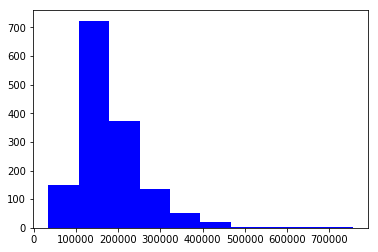

In [89]:
plt.hist(Housing['SalePrice'], color='blue')
plt.show()

##### Sales price is right skewed. So, we perform log transformation so that the skewness is nearly zero

Skew is: 1.8828757597682129
Skew is: 0.12134661989685333


(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46027076, 10.76769112, 11.07511148, 11.38253184, 11.6899522 ,
        11.99737256, 12.30479292, 12.61221328, 12.91963363, 13.22705399,
        13.53447435]),
 <a list of 10 Patch objects>)

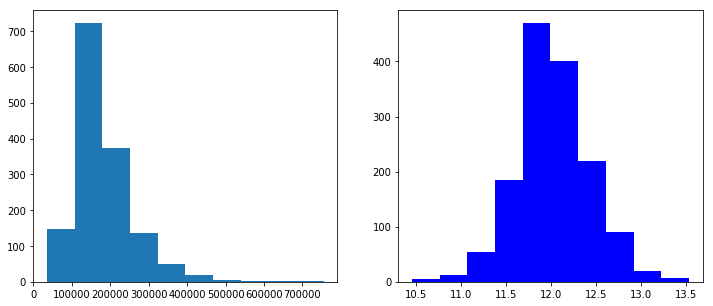

In [90]:
# Determining the Skewness of data 
print ("Skew is:", Housing.SalePrice.skew())
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(Housing.SalePrice)

plt.subplot(1,2,2)
Housing['Skewed_SP'] = np.log(Housing['SalePrice']+1)
print ("Skew is:", Housing['Skewed_SP'].skew())
plt.hist(Housing['Skewed_SP'], color='blue')


In [91]:
Housing.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Skewed_SP
0,60,RL,65,8450,1,Reg,Lvl,1,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,12.247699
1,20,RL,80,9600,1,Reg,Lvl,1,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,12.109016
2,60,RL,68,11250,1,IR1,Lvl,1,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,12.317171
3,70,RL,60,9550,1,IR1,Lvl,1,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,11.849405
4,60,RL,84,14260,1,IR1,Lvl,1,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,12.429220
5,50,RL,85,14115,1,IR1,Lvl,1,Inside,Gtl,...,320,0,0,700,10,2009,WD,Normal,143000,11.870607
6,20,RL,75,10084,1,Reg,Lvl,1,Inside,Gtl,...,0,0,0,0,8,2007,WD,Normal,307000,12.634606
7,60,RL,60,10382,1,IR1,Lvl,1,Corner,Gtl,...,0,0,0,350,11,2009,WD,Normal,200000,12.206078
8,50,RM,51,6120,1,Reg,Lvl,1,Inside,Gtl,...,0,0,0,0,4,2008,WD,Abnorml,129900,11.774528
9,190,RL,50,7420,1,Reg,Lvl,1,Corner,Gtl,...,0,0,0,0,1,2008,WD,Normal,118000,11.678448


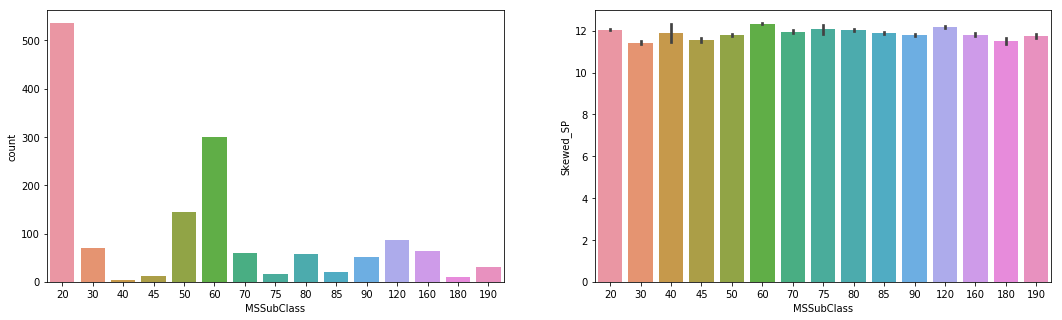

In [92]:
# MSSubclass metric

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(x='MSSubClass',data=Housing)

plt.subplot(1,2,2)
sns.barplot(x='MSSubClass', y='Skewed_SP', data =Housing)
plt.show()

Here MSSubClass=20 is most highest sale next stands on MSSubClass=60, i.e 201 story occupies high sales and next comes to 602 

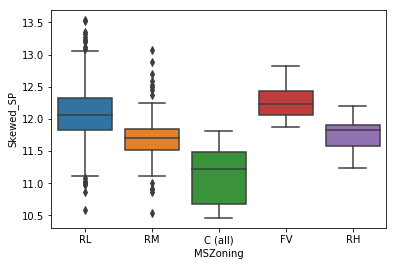

In [93]:
# Ms Zoning metric
sns.boxplot(x='MSZoning', y='Skewed_SP', data=Housing)

Here MSZoning 'FV' i.e Floating Village Residential stands highest sales, next stands 'RL' i.e Residential Low Density

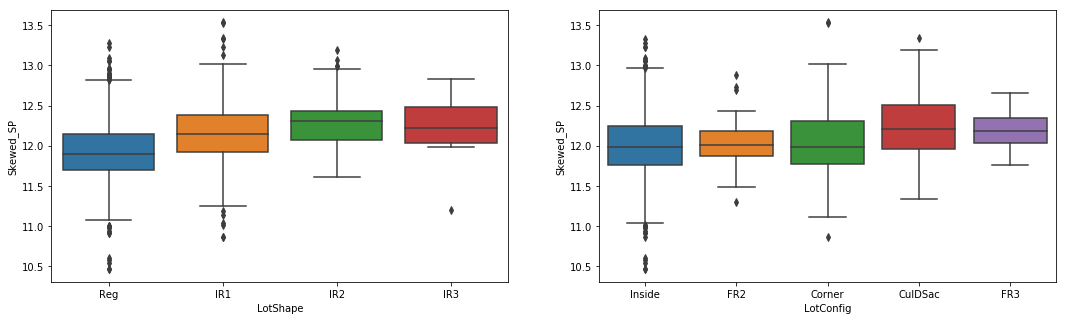

In [94]:
### Lot category

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.boxplot(x='LotShape', y='Skewed_SP', data =Housing)

plt.subplot(1,2,2)
sns.boxplot(x='LotConfig', y='Skewed_SP', data =Housing)
plt.show()

Here in lotshape IR3 i.e Irregular is in high sales, in lotconfig 'Culdsac' is in high sales

In [95]:
Housing.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', 'NA', 'Fa'], dtype=object)

Replace Qual and condition with grade i.e with number

In [96]:
def qual(x):
    if x == 'Ex':
        return 5
    elif x == 'Gd':
        return 4
    elif x == 'TA':
        return 3
    elif x == 'Fa':
        return 2
    elif x == 'Po':
        return 1
    else:
        return 0
    
    
Housing['BsmtQual'] = Housing['BsmtQual'].apply(lambda x: qual(x))

Housing['BsmtCond'] = Housing['BsmtCond'].apply(lambda x: qual(x))

Housing['ExterQual'] = Housing['ExterQual'].apply(lambda x: qual(x))

Housing['ExterCond'] = Housing['ExterCond'].apply(lambda x: qual(x))

Housing['HeatingQC'] = Housing['HeatingQC'].apply(lambda x: qual(x))

Housing['KitchenQual'] = Housing['KitchenQual'].apply(lambda x: qual(x))

Housing['FireplaceQu'] = Housing['FireplaceQu'].apply(lambda x: qual(x))

Housing['GarageQual'] = Housing['GarageQual'].apply(lambda x: qual(x))

Housing['GarageCond'] = Housing['GarageCond'].apply(lambda x: qual(x))

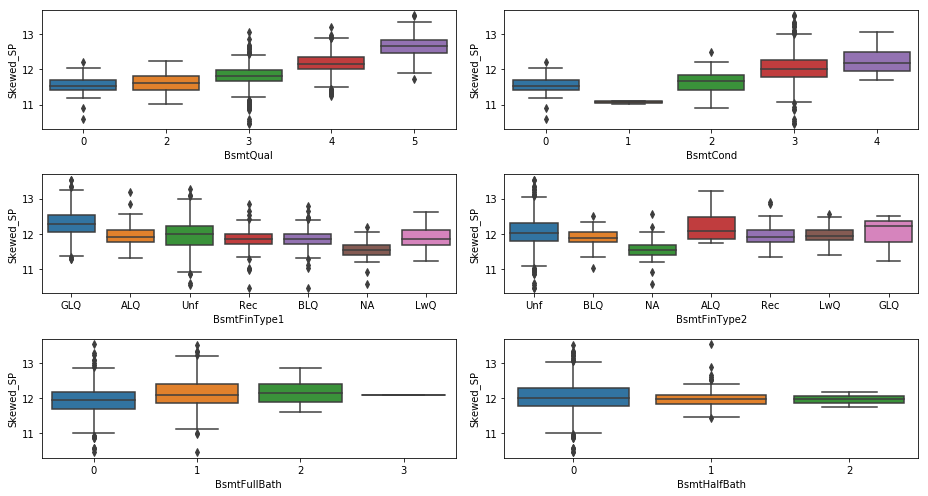

In [97]:
# Basement metrics

plt.figure(figsize=(13,7))
plt.subplot(3,2,1)
sns.boxplot(x='BsmtQual', y='Skewed_SP', data =Housing)

plt.subplot(3,2,2)
sns.boxplot(x='BsmtCond', y='Skewed_SP', data =Housing)

plt.subplot(3,2,3)
sns.boxplot(x='BsmtFinType1', y='Skewed_SP', data =Housing)

plt.subplot(3,2,4)
sns.boxplot(x='BsmtFinType2', y='Skewed_SP', data =Housing)

plt.subplot(3,2,5)
sns.boxplot(x='BsmtFullBath', y='Skewed_SP', data =Housing)

plt.subplot(3,2,6)
sns.boxplot(x='BsmtHalfBath', y='Skewed_SP', data =Housing)

plt.tight_layout()
plt.show()

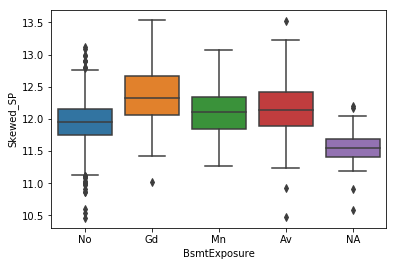

In [98]:
# BsmtExposure Metric
sns.boxplot(x='BsmtExposure', y='Skewed_SP', data = Housing)
plt.show()

Here we can notice that Basement Quality and Basement condition are excellent and good respectively

1. High sales taking place when Basement Quality either excellent or good and Basement condition is good.
2. In BsmtFinType1: Rating of basement finished area i.e GLQ (Good Living Quarters) are giving high sales
3. In BsmtFinType2: Rating of basement finished area (if multiple types) i.e ALQ (Average Living Quarters) are giving high sales
4. In BsmtFullBath: Basement full bathrooms, high sales are getting if atleast one full bathroom available
5. In BsmtHalfBath: Basement half bathrooms, sales are so attracting in this area.
6. In BsmtExposure: Refers to walkout or garden level walls, Sales are high where Bsmtexposure is good exposure or average

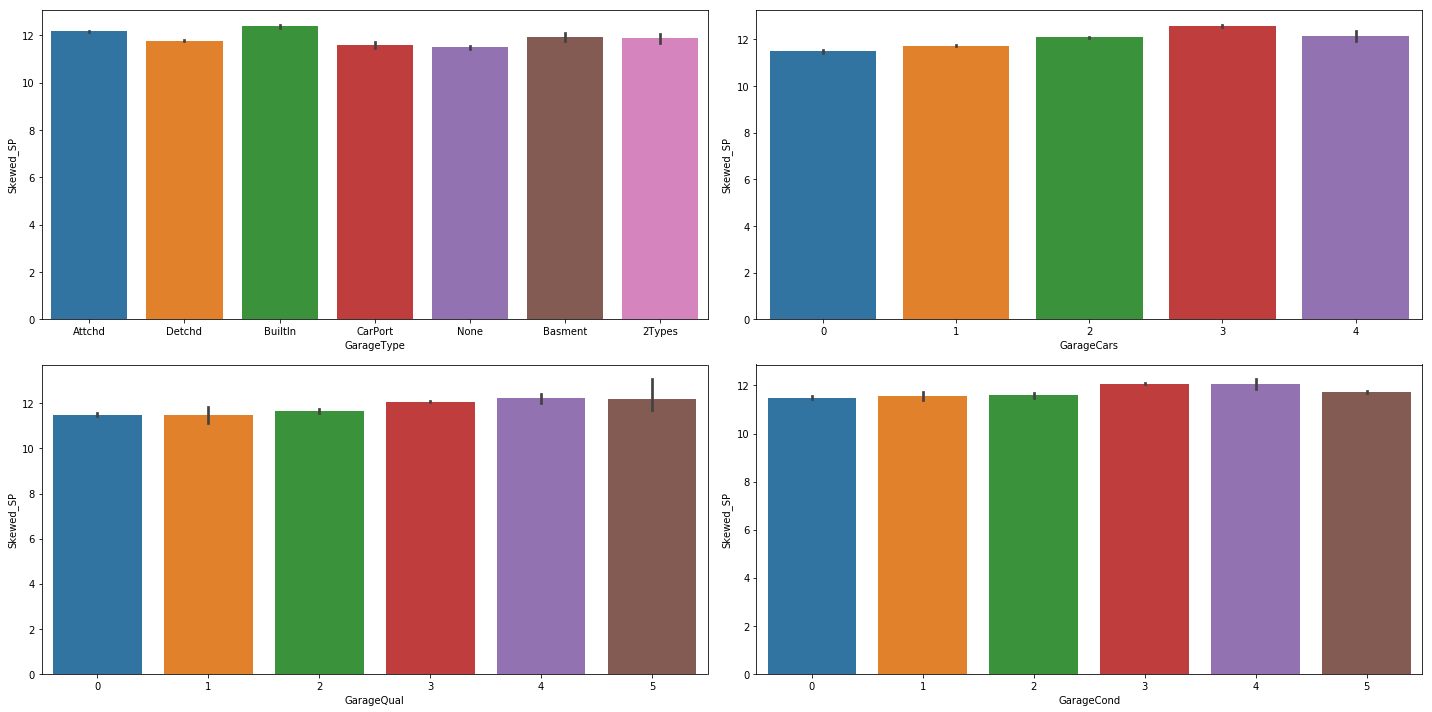

In [99]:
# Garage's Metric
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(x='GarageType', y='Skewed_SP', data = Housing)

plt.subplot(2,2,2)
sns.barplot(x='GarageCars', y='Skewed_SP', data = Housing)

plt.subplot(2,2,3)
sns.barplot(x='GarageQual', y='Skewed_SP', data = Housing)

plt.subplot(2,2,4)
sns.barplot(x='GarageCond', y='Skewed_SP', data = Housing)

plt.tight_layout()
plt.show()

Observations:

1. In Garatype BuiltIn	Built-In (Garage part of house - typically has room above garage) has more attractive sales and next comes to option of Attached to home 
2. High sales took place if Garage car place has more than 2
3. High sales took place if Garage quality either excellent or good
4. High sales took place if Garage condition is fair and also excellent and good

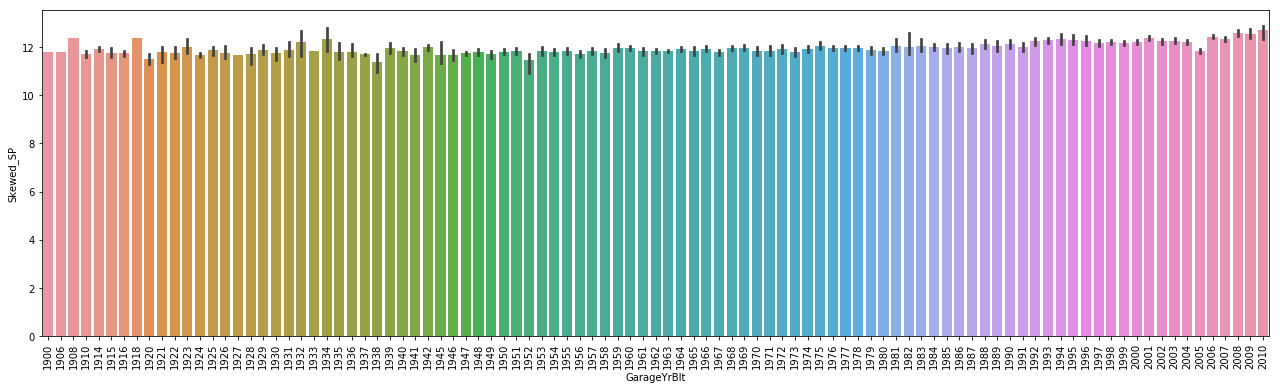

In [100]:
# GarageYrBlt Metric

plt.figure(figsize=(22,6))
sns.barplot(x='GarageYrBlt', y='Skewed_SP', data = Housing)
xticks(rotation = 90)
plt.show()

Sales are increasing from 1990, increasing sales from 2008 to 2010, but as of now we are not sure the reason of sales taken place

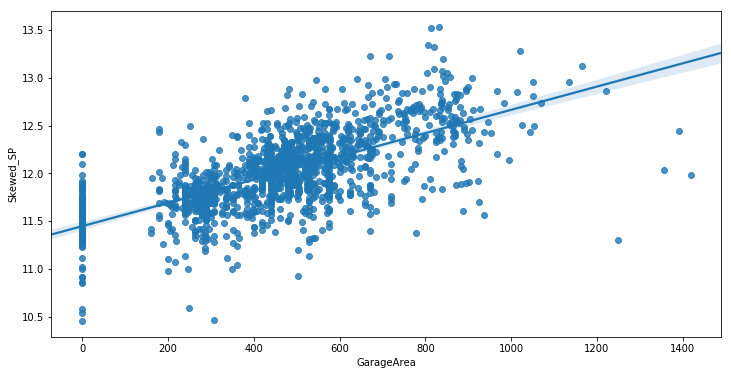

In [101]:
# GarageArea Metric

## Before treating outliers

plt.figure(figsize=(12,6))
sns.regplot(x='GarageArea',y='Skewed_SP',data=Housing)
plt.show()

GarageArea and SalePrice are directly proportional.

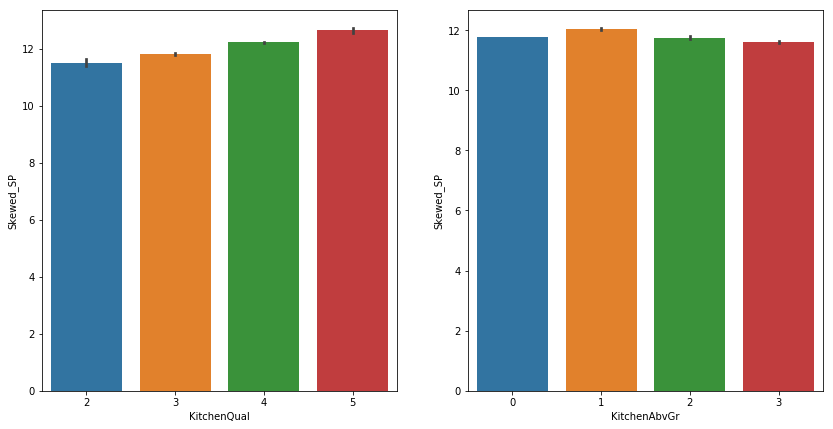

In [102]:
# KitchenQual Metric

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.barplot(x='KitchenQual', y='Skewed_SP', data = Housing)

plt.subplot(1,2,2)
sns.barplot(x='KitchenAbvGr', y='Skewed_SP', data = Housing)

plt.show()


Sales are more attractive, if Kitchen quality are excellent and good and if kitchen above grade of 1 also attracting more sales


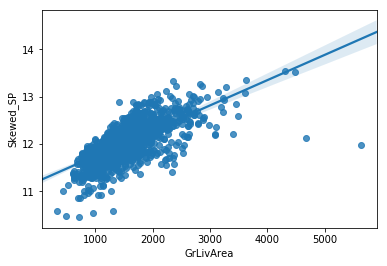

In [103]:
# GrLivArea Metric

sns.regplot(x='GrLivArea',y='Skewed_SP',data=Housing)

Observations:

SalePrice increases as the GrLivArea increases. We will also get rid of the outliers which severely affect the prediction of the survival rate.

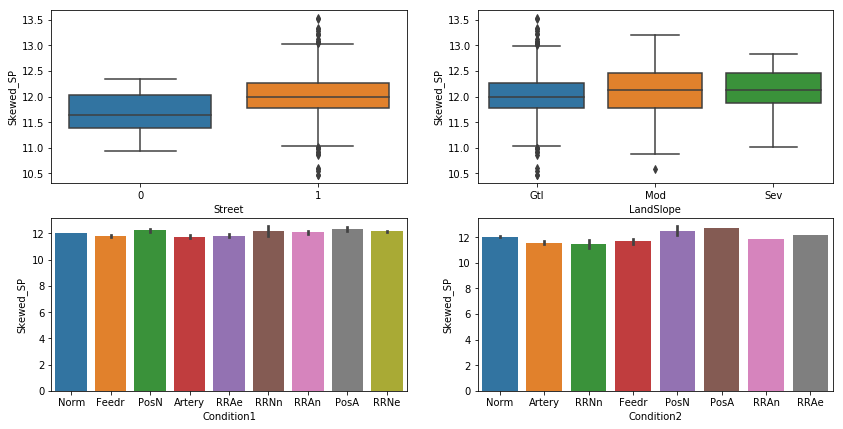

In [104]:
## Environment Metric's

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Street',y='Skewed_SP',data=Housing)

plt.subplot(2,2,2)
sns.boxplot(x='LandSlope',y='Skewed_SP',data=Housing)

plt.subplot(2,2,3)
sns.barplot(x='Condition1',y='Skewed_SP',data=Housing)

plt.subplot(2,2,4)
sns.barplot(x='Condition2',y='Skewed_SP',data=Housing)

plt.show()


1. In Street of 'Paved' have more attractive for sales rather than Gravel
2. In Land slope, Modearte slope and Gentle slope occupies more sales rather than severe slope
3. In Condition1 and Condition2-->  Proximity to various conditions occupies more sales on PosA i.e Adjacent to postive off-site feature and PosN i.e Near positive off-site feature--park


In [105]:
round(Housing.groupby('Neighborhood')['Skewed_SP'].mean()*100,2).sort_values(ascending=False)

Neighborhood
NoRidge    1267.60
NridgHt    1261.94
StoneBr    1258.55
Timber     1236.35
Veenker    1234.42
Somerst    1229.65
ClearCr    1223.99
Crawfor    1220.67
Blmngtn    1216.94
CollgCr    1216.36
Gilbert    1215.58
NWAmes     1213.06
SawyerW    1209.07
Mitchel    1193.40
NAmes      1186.81
NPkVill    1186.65
SWISU      1183.84
Blueste    1182.65
Sawyer     1181.15
Edwards    1171.23
OldTown    1170.39
BrkSide    1167.97
BrDale     1154.79
MeadowV    1147.45
IDOTRR     1144.69
Name: Skewed_SP, dtype: float64

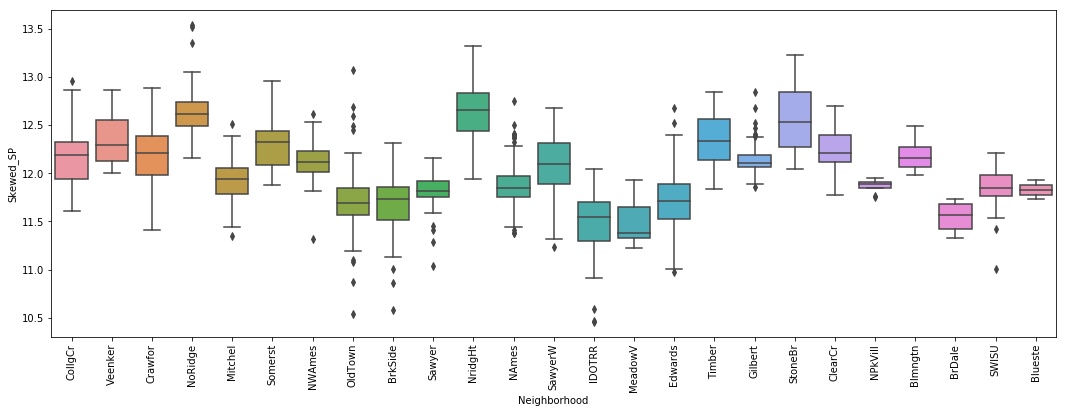

In [106]:
plt.figure(figsize=(18,6))
sns.boxplot(x='Neighborhood',y='Skewed_SP',data=Housing)
xticks(rotation = 90)
plt.show()

Observations:
1. We will see the if Neighborhood have NoRidge i.e Northridge,  NridgHt	Northridge Height, StoneBr	Stone Brook have high sales

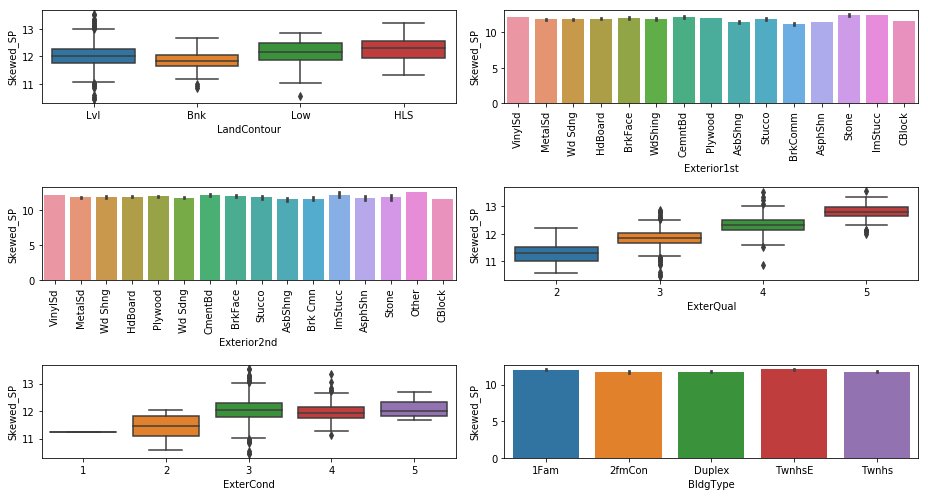

In [107]:
### Specification Metric's

plt.figure(figsize=(13,7))
plt.subplot(3,2,1)
sns.boxplot(x='LandContour',y='Skewed_SP',data=Housing)

plt.subplot(3,2,2)
sns.barplot(x='Exterior1st',y='Skewed_SP',data=Housing)
xticks(rotation = 90)

plt.subplot(3,2,3)
sns.barplot(x='Exterior2nd',y='Skewed_SP',data=Housing)
xticks(rotation = 90)

plt.subplot(3,2,4)
sns.boxplot(x='ExterQual',y='Skewed_SP',data=Housing)

plt.subplot(3,2,5)
sns.boxplot(x='ExterCond',y='Skewed_SP',data=Housing)

plt.subplot(3,2,6)
sns.barplot(x='BldgType',y='Skewed_SP',data=Housing)

plt.tight_layout()
plt.show() 

Observations:

1. If HLS	Hillside - Significant slope from side to side and Low	Depressio as LandContour sales are attracting more
2. In Exterior1st: Exterior covering on house all specification are playing an vital role expect Brick common and 	Asphalt Shingle
3. In Exterior2nd: Exterior covering on house (if more than one material) all specification are playing an vital role expect Brick common, 	Cinder Block and 	Asphalt Shingle
4. Sales are high if Evaluates the quality of the material on the exterior are excellent and good
5. Sales are high if Exterior condition are excellent and good
6. Sales are high only if building type must be 1Fam Single-family Detached	and Townhouse End Unit

In [108]:
round(Housing.groupby('Heating')['Skewed_SP'].mean()*100,2).sort_values(ascending=False)

Heating
GasA     1203.21
GasW     1193.07
OthW     1174.16
Wall     1142.98
Floor    1119.14
Grav     1116.59
Name: Skewed_SP, dtype: float64

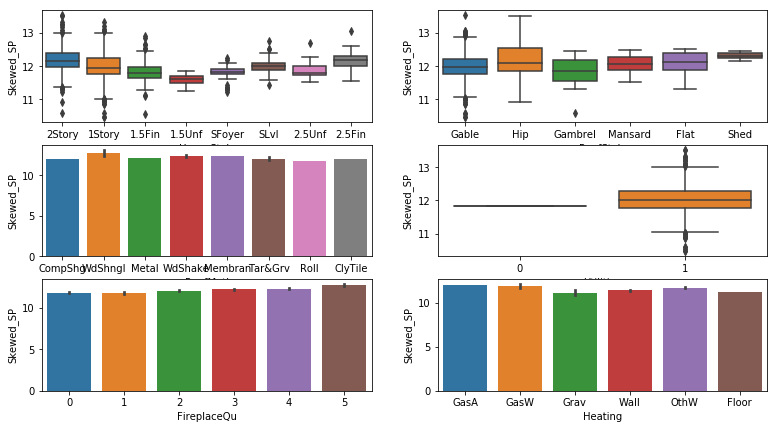

In [109]:
plt.figure(figsize=(13,7))
plt.subplot(3,2,1)
sns.boxplot(x='HouseStyle',y='Skewed_SP',data=Housing)

plt.subplot(3,2,2)
sns.boxplot(x='RoofStyle',y='Skewed_SP',data=Housing)
            
plt.subplot(3,2,3)
sns.barplot(x='RoofMatl',y='Skewed_SP',data=Housing)
            
plt.subplot(3,2,4)
sns.boxplot(x='Utilities',y='Skewed_SP',data=Housing)
            
plt.subplot(3,2,5)
sns.barplot(x='FireplaceQu',y='Skewed_SP',data=Housing)

plt.subplot(3,2,6)
sns.barplot(x='Heating',y='Skewed_SP',data=Housing)
            


Observations:
1. If House style:dwelling style be 2.5Fin	Two and one-half story: 2nd level finished and 	Two story than sales are high
2. Sales are attracting more of roof style has shed, Hip and flat
3. Sales are high if roof material would 	Wood Shingle and Membrane
4. If utilities are marked by 'all public utilities' than sales are high
5. Sales are high only if Fireplace quality are excellent and good
6. Sales are high only if Heating specification are 	Gas forced warm air furnace and 	Gas hot water or steam heat

In [110]:
round(Housing.groupby('Foundation')['Skewed_SP'].mean()*100,2).sort_values(ascending=False)

Foundation
PConc     1226.17
Wood      1210.25
Stone     1193.32
CBlock    1187.01
BrkTil    1172.25
Slab      1153.30
Name: Skewed_SP, dtype: float64

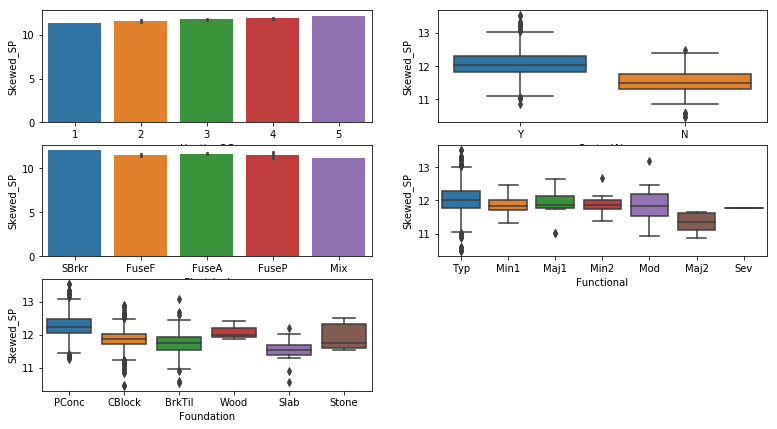

In [111]:
plt.figure(figsize=(13,7))
plt.subplot(3,2,1)
sns.barplot(x='HeatingQC',y='Skewed_SP',data=Housing)
            
plt.subplot(3,2,2)
sns.boxplot(x='CentralAir',y='Skewed_SP',data=Housing)

plt.subplot(3,2,3)
sns.barplot(x='Electrical',y='Skewed_SP',data=Housing)
            
plt.subplot(3,2,4)
sns.boxplot(x='Functional',y='Skewed_SP',data=Housing)
           
plt.subplot(3,2,5)
sns.boxplot(x='Foundation',y='Skewed_SP',data=Housing)

In [112]:
round(Housing.groupby('SaleType')['Skewed_SP'].mean()*100,2).sort_values(ascending=False)

SaleType
Con      1248.39
New      1245.94
CWD      1219.83
ConLI    1204.49
WD       1199.11
COD      1182.74
ConLD    1177.30
ConLw    1176.97
Oth      1167.53
Name: Skewed_SP, dtype: float64

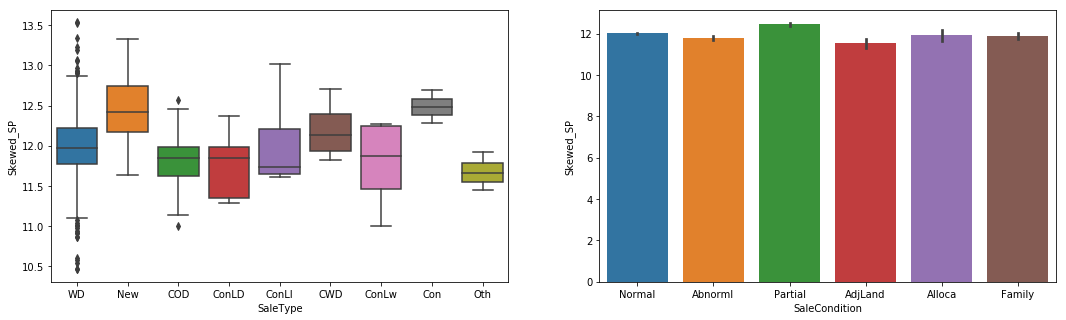

In [113]:
# Sale type and sale condition

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.boxplot(x='SaleType',y='Skewed_SP',data=Housing)
            
plt.subplot(1,2,2)
sns.barplot(x='SaleCondition',y='Skewed_SP',data=Housing)

plt.show()

observations: 

---> Sales are high if house has Contract 15% Down payment regular term and if it is New	Home just constructed and sold and also if we see sale condition it has Partial	Home was not completed when last assessed (associated with New Homes) and  - two linked properties with separate deed

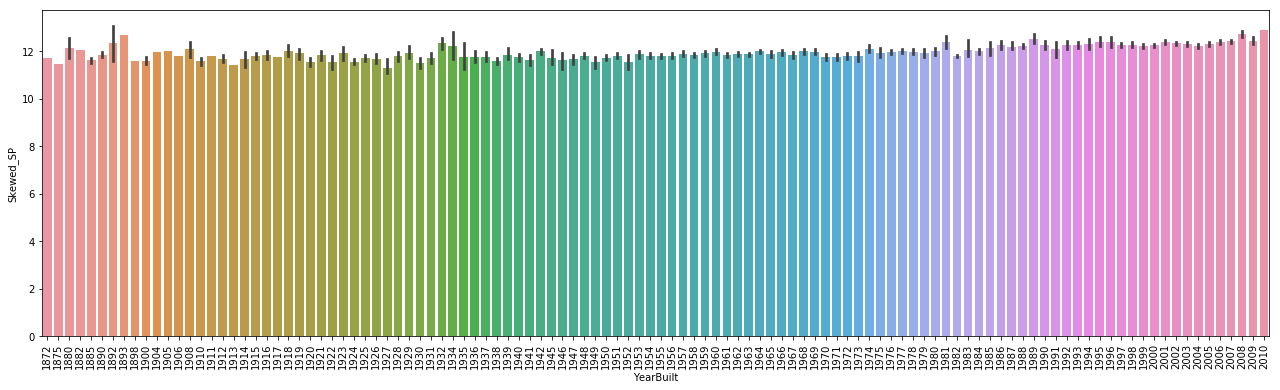

In [114]:
plt.figure(figsize=(22,6))
sns.barplot(x='YearBuilt', y='Skewed_SP', data = Housing)
xticks(rotation = 90)
plt.show()

No Observation made through this metric, because it shows the sale by year wise

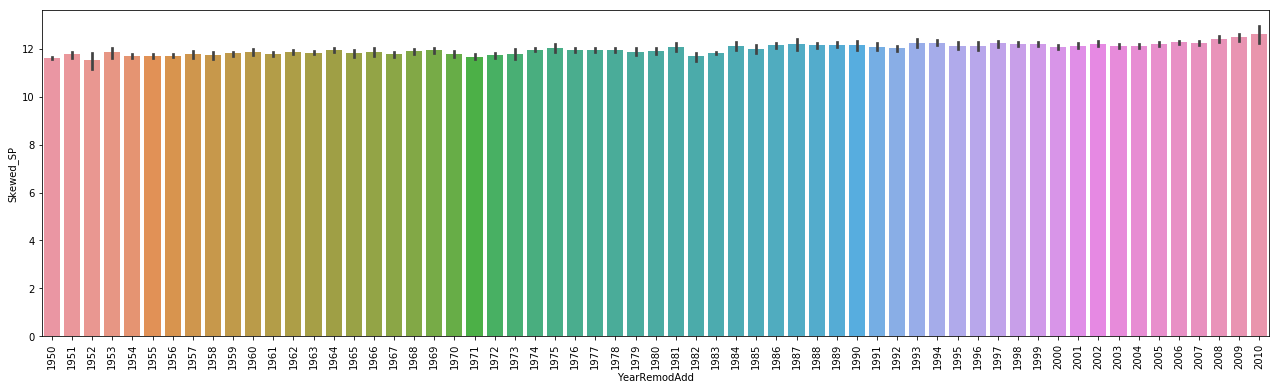

In [115]:
plt.figure(figsize=(22,6))
sns.barplot(x='YearRemodAdd', y='Skewed_SP', data=Housing)
xticks(rotation = 90)
plt.show()

No observation has been made through this metric


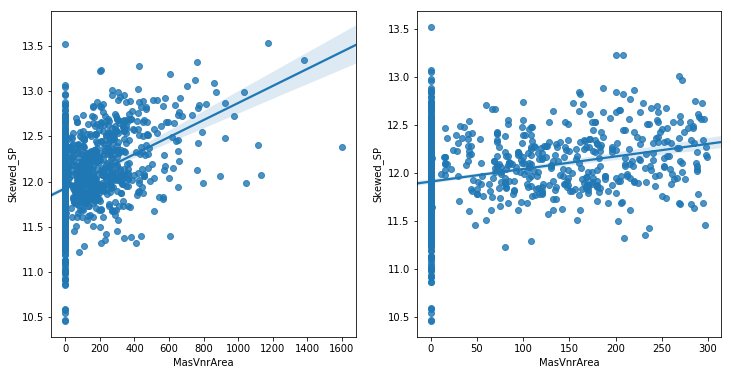

In [116]:
# MasVnrArea Metric

## Before treating outliers
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.regplot(x='MasVnrArea',y='Skewed_SP',data=Housing)

### After treating outliers
plt.subplot(1,2,2)
train = Housing[Housing['MasVnrArea'] < 300]
sns.regplot(x='MasVnrArea',y='Skewed_SP',data=train)

Here sales are attracting when MasVnrArea is very low, if its value is increasing sales also not so good

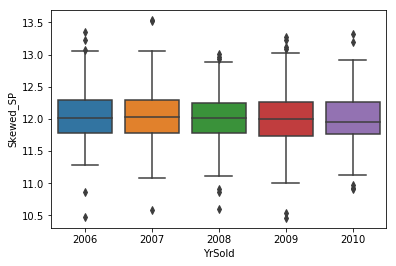

In [117]:
sns.boxplot(x='YrSold', y='Skewed_SP', data=Housing)

No observation made through this metric

In [118]:
round(Housing.groupby('MoSold')['Skewed_SP'].mean()*100,2).sort_values(ascending=False)

MoSold
9     1209.86
11    1207.49
12    1206.23
8     1204.91
2     1204.71
7     1204.28
3     1203.01
10    1202.01
6     1201.99
5     1198.49
4     1197.21
1     1196.33
Name: Skewed_SP, dtype: float64

In [119]:
Housing['MoSold'].astype(object)

def mon(x):
    if x == 1:
        return 'jan'
    elif x==2:
        return 'feb'
    elif x==3:
        return 'mar'
    elif x==4:
        return 'apr'
    elif x==5:
        return 'may'
    elif x==6:
        return 'jun'
    elif x==7:
        return 'jul'
    elif x==8:
        return 'aug'
    elif x==9:
        return 'sep'
    elif x==10:
        return 'oct'
    elif x==11:
        return 'nov'
    else:
        return 'dec'


Housing['MoSold'] = Housing['MoSold'].apply(lambda x:mon(x))
 


In [120]:
Housing.groupby('MoSold')['Skewed_SP'].mean().sort_values(ascending=False)

MoSold
sep    12.098567
nov    12.074853
dec    12.062266
aug    12.049095
feb    12.047058
jul    12.042797
mar    12.030140
oct    12.020141
jun    12.019944
may    11.984852
apr    11.972063
jan    11.963307
Name: Skewed_SP, dtype: float64

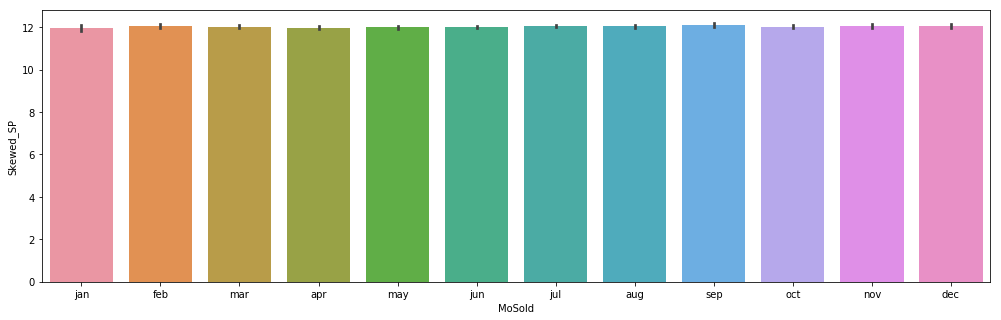

In [121]:
plt.figure(figsize=(17,5))
sns.barplot(x='MoSold', y='Skewed_SP', data=Housing, order =['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.show()

In Month of Sep,Nov and dec sales are more high

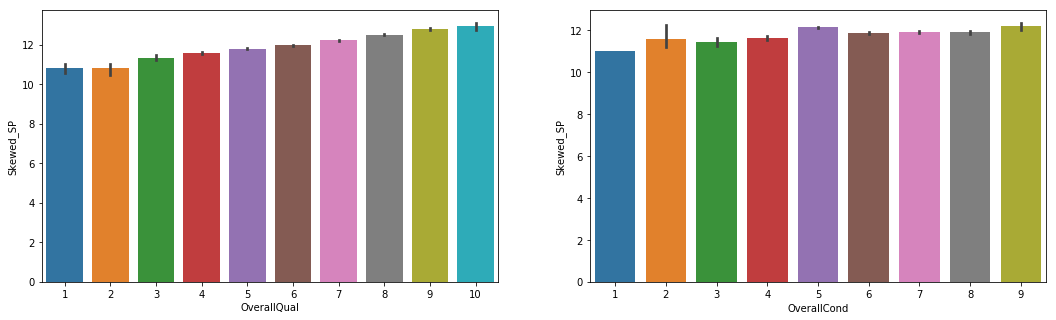

In [122]:
# Sale type and sale condition

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.barplot(x='OverallQual',y='Skewed_SP',data=Housing)
            
plt.subplot(1,2,2)
sns.barplot(x='OverallCond',y='Skewed_SP',data=Housing)

plt.show()

No observation made through this metrics

Based on EDA, we have seen many columns are giving usefull information with very high count,i just want to drop only few columns which are giving much information 


In [123]:
Housing = Housing.drop(['FireplaceQu','GarageYrBlt', 'Condition1', 'Condition2', 'LotConfig',
                        'BsmtHalfBath','MasVnrType','Functional','YearBuilt','YearRemodAdd',
                        'YrSold','MiscVal','OverallQual','OverallCond','KitchenAbvGr','MasVnrArea',
                        'Utilities','Street','FullBath','HalfBath','BedroomAbvGr','HeatingQC',
                        'Electrical','Functional','Foundation','LotArea','1stFlrSF','EnclosedPorch',
                        '2ndFlrSF','TotRmsAbvGrd','Fireplaces','WoodDeckSF', 'OpenPorchSF',
                        '3SsnPorch','ScreenPorch','ExterQual','Exterior1st','SalePrice'],1)


In [124]:
Housing.shape

(1460, 40)

In [125]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 40 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null int64
LotShape         1460 non-null object
LandContour      1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior2nd      1460 non-null object
ExterCond        1460 non-null int64
BsmtQual         1460 non-null int64
BsmtCond         1460 non-null int64
BsmtExposure     1460 non-null object
BsmtFinType1     1460 non-null object
BsmtFinSF1       1460 non-null int64
BsmtFinType2     1460 non-null object
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
Heating          1460 non-null object
CentralAir       1460 non-nu

In [126]:
Housing.describe()

,MSSubClass,LotFrontage,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,KitchenQual,GarageCars,GarageArea,GarageQual,GarageCond,PoolArea,Skewed_SP
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,68.267123,3.083562,3.489041,2.934932,443.639726,46.549315,567.240411,1057.429452,5.844521,1515.463699,0.425342,3.511644,1.767123,472.980137,2.810274,2.808904,2.758904,12.024057
std,42.300571,22.356355,0.351054,0.876478,0.552159,456.098091,161.319273,441.866955,438.705324,48.623081,525.480383,0.518911,0.663760,0.747315,213.804841,0.722898,0.719685,40.177307,0.399449
min,20.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.460271
25%,20.000000,60.000000,3.000000,3.000000,3.000000,0.000000,0.000000,223.000000,795.750000,0.000000,1129.500000,0.000000,3.000000,1.000000,334.500000,3.000000,3.000000,0.000000,11.775105
50%,50.000000,63.000000,3.000000,4.000000,3.000000,383.500000,0.000000,477.500000,991.500000,0.000000,1464.000000,0.000000,3.000000,2.000000,480.000000,3.000000,3.000000,0.000000,12.001512
75%,70.000000,79.000000,3.000000,4.000000,3.000000,712.250000,0.000000,808.000000,1298.250000,0.000000,1776.750000,1.000000,4.000000,2.000000,576.000000,3.000000,3.000000,0.000000,12.273736
max,190.000000,313.000000,5.000000,5.000000,4.000000,5644.000000,1474.000000,2336.000000,6110.000000,572.000000,5642.000000,3.000000,5.000000,4.000000,1418.000000,5.000000,5.000000,738.000000,13.534474


#### Data preparation

#### Converting Binary variables

In [127]:
Housing.CentralAir.unique()

array(['Y', 'N'], dtype=object)

In [128]:
# converting Yes to 1 No to 0
Housing['CentralAir'] = Housing['CentralAir'].map({'Y': 1, 'N': 0})


In [129]:
House_numeric = Housing.select_dtypes(include=['int64'])
House_numeric.head()

,MSSubClass,LotFrontage,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,LowQualFinSF,GrLivArea,BsmtFullBath,KitchenQual,GarageCars,GarageArea,GarageQual,GarageCond,PoolArea
0,60,65,3,4,3,706,0,150,856,1,0,1710,1,4,2,548,3,3,0
1,20,80,3,4,3,978,0,284,1262,1,0,1262,0,3,2,460,3,3,0
2,60,68,3,4,3,486,0,434,920,1,0,1786,1,4,2,608,3,3,0
3,70,60,3,3,4,216,0,540,756,1,0,1717,1,4,3,642,3,3,0
4,60,84,3,4,3,655,0,490,1145,1,0,2198,1,4,3,836,3,3,0


In [130]:
House_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
MSSubClass      1460 non-null int64
LotFrontage     1460 non-null int64
ExterCond       1460 non-null int64
BsmtQual        1460 non-null int64
BsmtCond        1460 non-null int64
BsmtFinSF1      1460 non-null int64
BsmtFinSF2      1460 non-null int64
BsmtUnfSF       1460 non-null int64
TotalBsmtSF     1460 non-null int64
CentralAir      1460 non-null int64
LowQualFinSF    1460 non-null int64
GrLivArea       1460 non-null int64
BsmtFullBath    1460 non-null int64
KitchenQual     1460 non-null int64
GarageCars      1460 non-null int64
GarageArea      1460 non-null int64
GarageQual      1460 non-null int64
GarageCond      1460 non-null int64
PoolArea        1460 non-null int64
dtypes: int64(19)
memory usage: 216.8 KB


In [131]:
House_categ = Housing.select_dtypes(include = ['object'])
House_categ.head()

,MSZoning,LotShape,LandContour,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior2nd,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,GarageType,GarageFinish,PavedDrive,MoSold,SaleType,SaleCondition
0,RL,Reg,Lvl,Gtl,CollgCr,1Fam,2Story,Gable,CompShg,VinylSd,No,GLQ,Unf,GasA,Attchd,RFn,Y,feb,WD,Normal
1,RL,Reg,Lvl,Gtl,Veenker,1Fam,1Story,Gable,CompShg,MetalSd,Gd,ALQ,Unf,GasA,Attchd,RFn,Y,may,WD,Normal
2,RL,IR1,Lvl,Gtl,CollgCr,1Fam,2Story,Gable,CompShg,VinylSd,Mn,GLQ,Unf,GasA,Attchd,RFn,Y,sep,WD,Normal
3,RL,IR1,Lvl,Gtl,Crawfor,1Fam,2Story,Gable,CompShg,Wd Shng,No,ALQ,Unf,GasA,Detchd,Unf,Y,feb,WD,Abnorml
4,RL,IR1,Lvl,Gtl,NoRidge,1Fam,2Story,Gable,CompShg,VinylSd,Av,GLQ,Unf,GasA,Attchd,RFn,Y,dec,WD,Normal


In [132]:
House_categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
MSZoning         1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior2nd      1460 non-null object
BsmtExposure     1460 non-null object
BsmtFinType1     1460 non-null object
BsmtFinType2     1460 non-null object
Heating          1460 non-null object
GarageType       1460 non-null object
GarageFinish     1460 non-null object
PavedDrive       1460 non-null object
MoSold           1460 non-null object
SaleType         1460 non-null object
SaleCondition    1460 non-null object
dtypes: object(20)
memory usage: 228.2+ KB


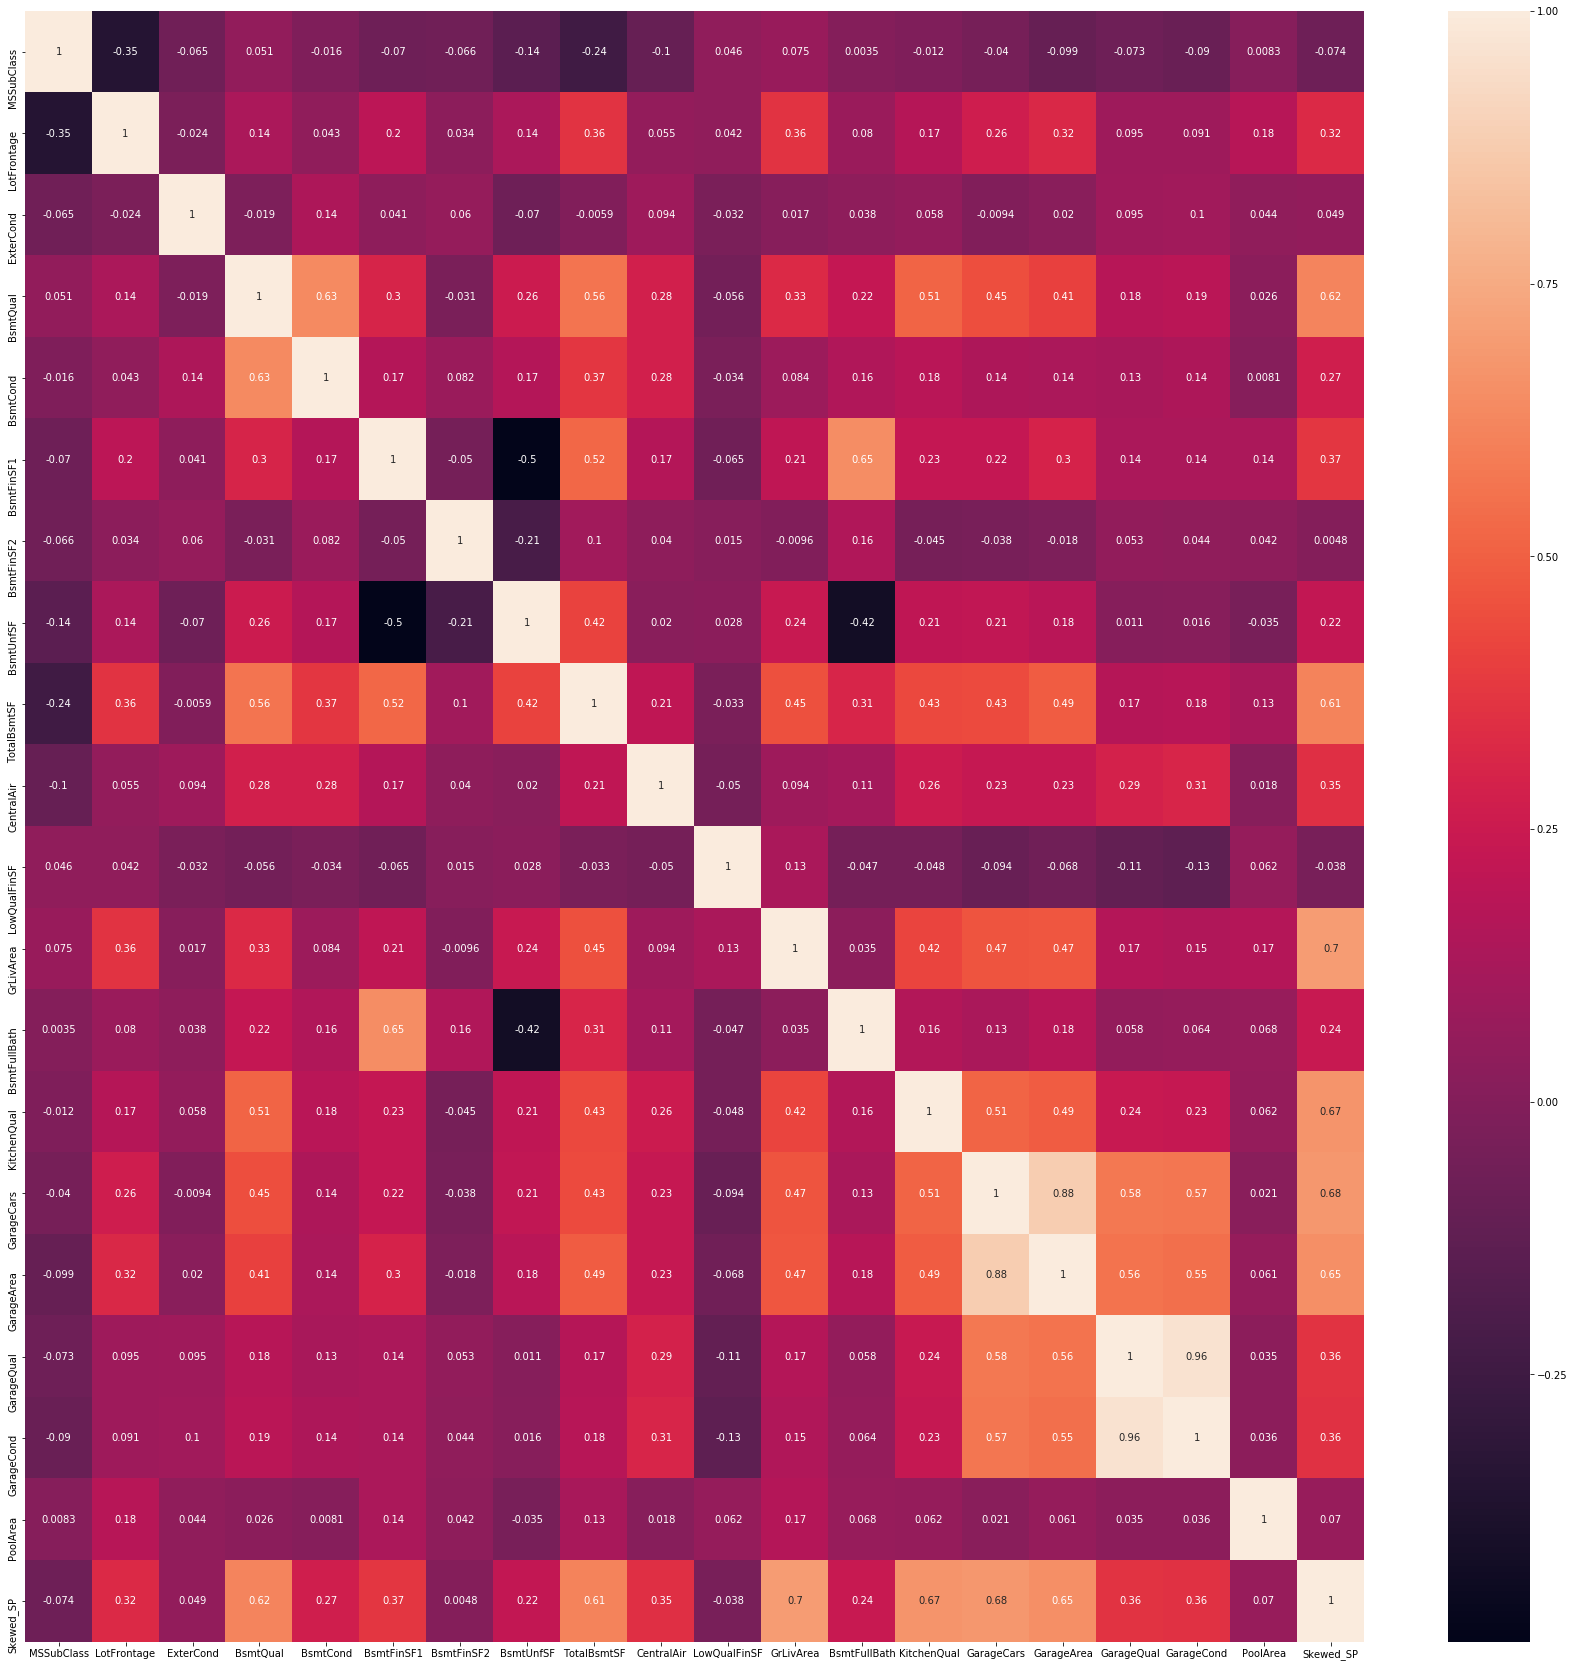

In [133]:
plt.figure(figsize = (30,30))      
sns.heatmap(Housing.corr(),annot = True)
plt.show()

#### Creating dummy variables

In [134]:
Housing_dummies = pd.get_dummies(House_categ, drop_first=True)
Housing_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [135]:
Housing.shape

(1460, 40)

In [136]:
#Drop categorical columns from dataframe

Housing = Housing.drop(list(House_categ.columns),axis=1)

In [137]:
# concat dummy variables with X
Housing = pd.concat([Housing, Housing_dummies], axis=1)

In [138]:
Housing.shape

(1460, 150)

In [139]:
Housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,68.267123,3.083562,3.489041,2.934932,443.639726,46.549315,567.240411,1057.429452,0.934932,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,42.300571,22.356355,0.351054,0.876478,0.552159,456.098091,161.319273,441.866955,438.705324,0.246731,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,20.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,3.000000,3.000000,3.000000,0.000000,0.000000,223.000000,795.750000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,63.000000,3.000000,4.000000,3.000000,383.500000,0.000000,477.500000,991.500000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,79.000000,3.000000,4.000000,3.000000,712.250000,0.000000,808.000000,1298.250000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
90%,120.000000,92.000000,4.000000,4.000000,3.000000,1065.500000,117.200000,1232.000000,1602.200000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
95%,160.000000,104.000000,4.000000,5.000000,3.000000,1274.000000,396.200000,1468.000000,1753.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
99%,190.000000,137.410000,4.000000,5.000000,4.000000,1572.410000,830.380000,1797.050000,2155.050000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000


In [140]:
# importing minmaxscalar package from sklearn library
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [141]:
       
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = Housing.drop(['Skewed_SP'], axis=1)

# Putting response variable to y
y = Housing['Skewed_SP']

In [142]:
# split into train and test
from sklearn.model_selection import cross_val_score
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

#### Ridge Regression

In [143]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [144]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=80]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006399,0.001958,0.000800,0.001600,0.0001,{'alpha': 0.0001},-0.110377,-0.107881,-0.105149,-0.109342,...,-0.106992,0.002973,12,-0.079583,-0.081620,-0.076270,-0.081075,-0.082017,-0.080113,0.002091
1,0.005600,0.001959,0.002400,0.001960,0.001,{'alpha': 0.001},-0.110396,-0.107880,-0.105203,-0.109136,...,-0.106974,0.002925,11,-0.079663,-0.081622,-0.076298,-0.081135,-0.082083,-0.080160,0.002095
2,0.005601,0.001958,0.001600,0.001960,0.01,{'alpha': 0.01},-0.111132,-0.107871,-0.106012,-0.107425,...,-0.107027,0.002747,13,-0.080393,-0.081645,-0.076817,-0.081776,-0.082708,-0.080668,0.002062
3,0.003202,0.002995,0.000000,0.000000,0.05,{'alpha': 0.05},-0.114119,-0.107843,-0.108483,-0.103850,...,-0.107838,0.003598,16,-0.083176,-0.081740,-0.079000,-0.084283,-0.085169,-0.082673,0.002165
4,0.004002,0.003579,0.003925,0.006052,0.1,{'alpha': 0.1},-0.115647,-0.107846,-0.110082,-0.102171,...,-0.108387,0.004465,21,-0.084876,-0.081857,-0.080668,-0.086044,-0.086824,-0.084054,0.002392


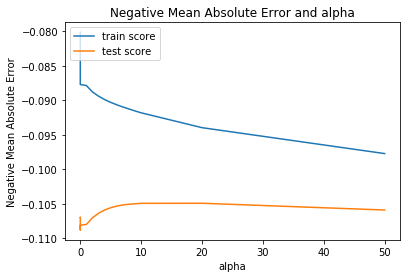

In [145]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [146]:
alpha = 9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-7.49083993e-04, -6.88187991e-04,  1.47845969e-02,  4.95422051e-02,
        4.20147960e-02, -1.65629106e-05,  2.28011787e-05,  3.61170464e-06,
        9.84996761e-06,  1.10568985e-01, -1.91318074e-04,  3.37710009e-04,
        4.13067074e-02,  7.69000840e-02,  6.04752500e-02,  2.00296875e-05,
        4.13480257e-02, -4.07638525e-03, -4.28123989e-04,  6.50221762e-02,
        6.38894405e-02,  8.50251785e-02,  2.49274895e-02,  2.39436648e-02,
       -3.36561222e-02,  2.23227551e-04,  6.70004251e-02,  5.31474324e-02,
        4.42435965e-02, -6.75968071e-03,  2.25068320e-02, -3.43818152e-03,
       -2.00688575e-03, -1.15642322e-02,  4.23825060e-02, -1.27456915e-02,
        1.22086400e-01, -1.18244083e-01, -1.00232382e-02, -9.52043623e-02,
       -9.61377356e-02, -3.98001934e-02, -3.74485443e-02,  3.22456932e-03,
       -1.59813099e-03,  6.62243307e-02,  1.33223359e-01, -6.11311974e-02,
        1.40542902e-02, -6.04253059e-02, -2.07575062e-02,  1.10641610e-01,
        7.89353690e-02,  

### Lasso

In [147]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [148]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.050400,0.013763,0.000800,0.001600,0.0001,{'alpha': 0.0001},-0.112873,-0.107873,-0.109048,-0.101165,...,-0.106523,0.004502,2,-0.085606,-0.082752,-0.081218,-0.086302,-0.087688,-0.084713,0.002376
1,0.009533,0.003047,0.000000,0.000000,0.001,{'alpha': 0.001},-0.105947,-0.111389,-0.114714,-0.098008,...,-0.104903,0.007692,1,-0.096949,-0.089700,-0.093373,-0.098376,-0.098292,-0.095338,0.003353
2,0.006611,0.005976,0.003125,0.006251,0.01,{'alpha': 0.01},-0.117888,-0.127260,-0.115753,-0.118121,...,-0.118077,0.005190,3,-0.115215,-0.110222,-0.113069,-0.115311,-0.116284,-0.114020,0.002170
3,0.005862,0.003110,0.001600,0.001960,0.05,{'alpha': 0.05},-0.143079,-0.161802,-0.151131,-0.138603,...,-0.146565,0.008919,4,-0.142372,-0.141487,-0.142136,-0.144992,-0.144461,-0.143090,0.001378
4,0.013600,0.001959,0.000800,0.001601,0.1,{'alpha': 0.1},-0.152310,-0.164573,-0.162528,-0.150230,...,-0.156541,0.005830,10,-0.155409,-0.145504,-0.151475,-0.156193,-0.157363,-0.153189,0.004321


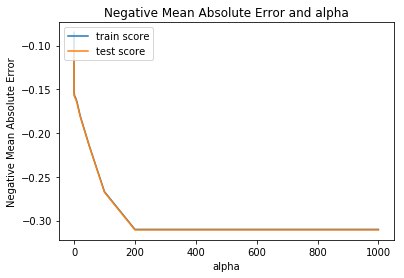

In [149]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [161]:
alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [162]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [152]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 9)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [153]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 127),
 ('LotFrontage', False, 140),
 ('ExterCond', False, 62),
 ('BsmtQual', False, 35),
 ('BsmtCond', False, 84),
 ('BsmtFinSF1', False, 137),
 ('BsmtFinSF2', False, 139),
 ('BsmtUnfSF', False, 138),
 ('TotalBsmtSF', False, 136),
 ('CentralAir', False, 26),
 ('LowQualFinSF', False, 130),
 ('GrLivArea', False, 129),
 ('BsmtFullBath', False, 58),
 ('KitchenQual', False, 20),
 ('GarageCars', False, 8),
 ('GarageArea', False, 132),
 ('GarageQual', False, 72),
 ('GarageCond', False, 133),
 ('PoolArea', False, 135),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 111),
 ('LotShape_IR3', False, 63),
 ('LotShape_Reg', False, 109),
 ('LandContour_HLS', False, 83),
 ('LandContour_Low', False, 76),
 ('LandContour_Lvl', False, 78),
 ('LandSlope_Mod', False, 124),
 ('LandSlope_Sev', False, 96),
 ('Neighborhood_Blueste', False, 61),
 ('Neighborhood_BrDale', False, 68),
 ('Neighborhood_BrkSide

In [154]:
col = X_train.columns[rfe.support_]
col

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_NoRidge', 'HouseStyle_2.5Unf', 'RoofMatl_WdShngl',
       'GarageType_Attchd', 'GarageType_BuiltIn'],
      dtype='object')

In [155]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=140)

In [156]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

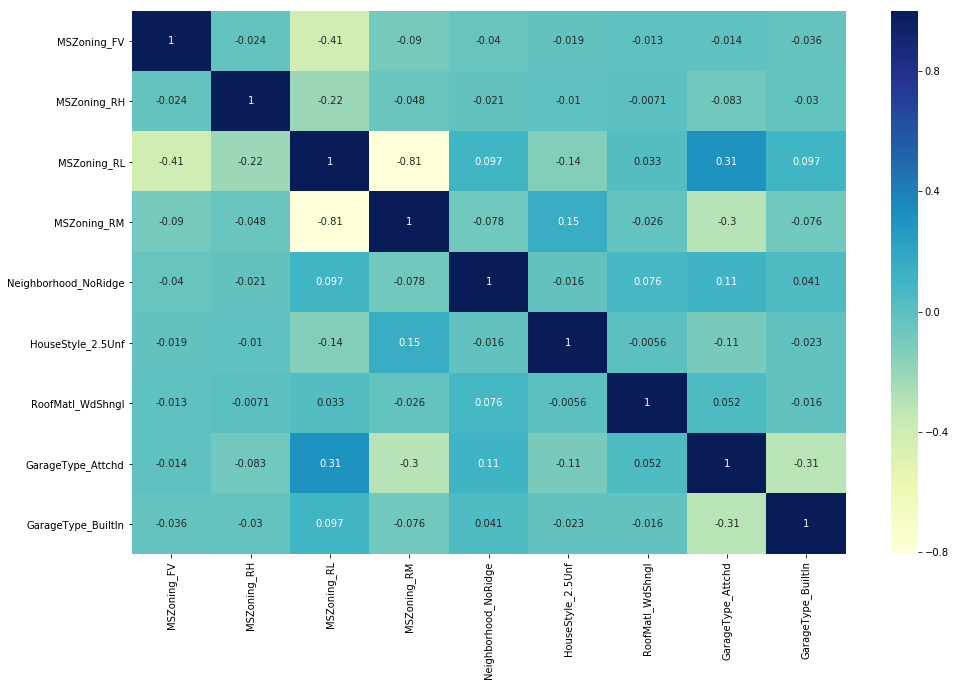

In [157]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(X_train_rfe.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [158]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [159]:
 # Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [160]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Skewed_SP   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     89.45
Date:                Thu, 11 Jul 2019   Prob (F-statistic):          3.85e-122
Time:                        22:41:49   Log-Likelihood:                -205.15
No. Observations:                1021   AIC:                             430.3
Df Residuals:                    1011   BIC:                             479.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.0553 